## Employee churn data analysis using ANN

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
df = pd.read_csv('cm.csv')

In [56]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [57]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [58]:
df['Geography'] = pd.Categorical(df['Geography']).codes
df['Gender'] = pd.Categorical(df['Gender']).codes

In [59]:
X = df.drop(['Exited', 'CustomerId', 'Surname'], axis=1)
y = df['Exited']


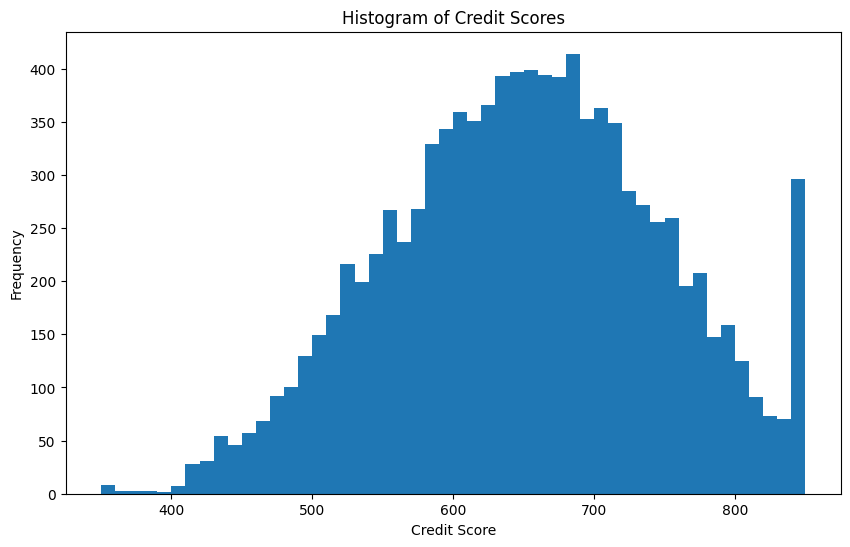

In [60]:
plt.figure(figsize=(10, 6))
plt.hist(X['CreditScore'], bins=50)
plt.title('Histogram of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

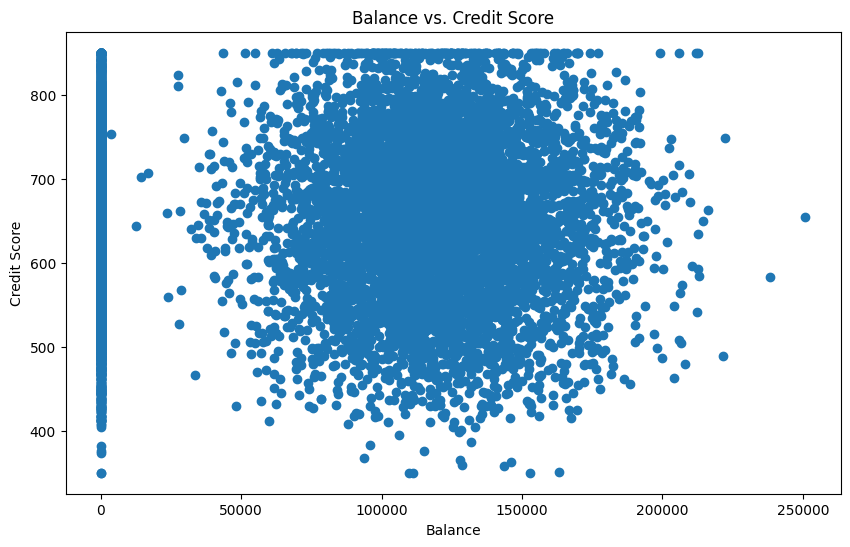

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(X['Balance'], X['CreditScore'])
plt.title('Balance vs. Credit Score')
plt.xlabel('Balance')
plt.ylabel('Credit Score')
plt.show()

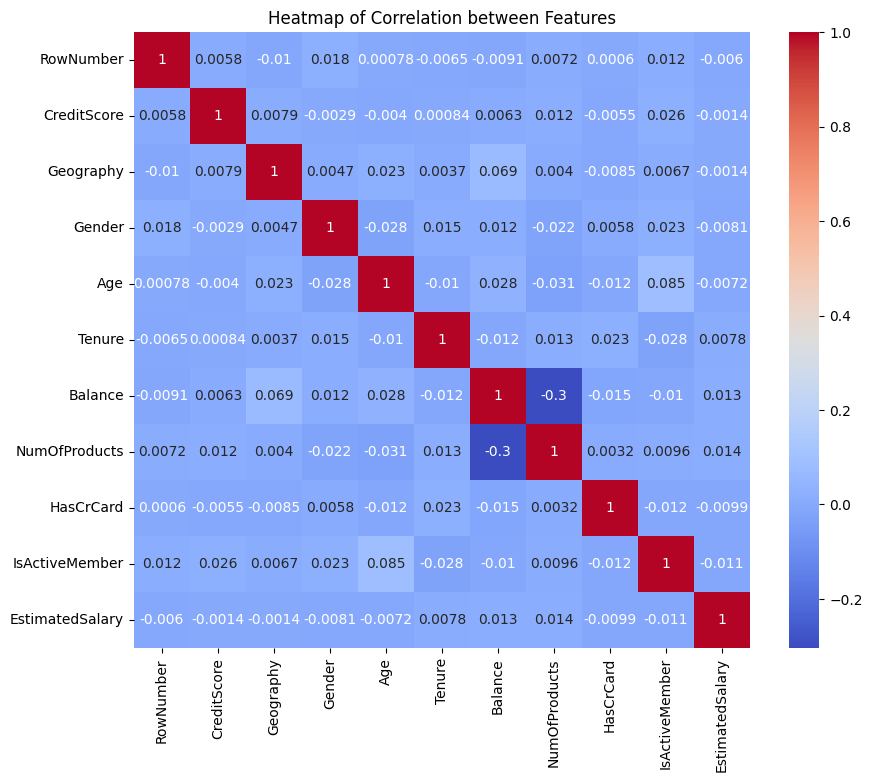

In [62]:
import seaborn as sns
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation between Features')
plt.show()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

In [66]:
y_pred = mlp.predict(X_test_scaled)

In [67]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8605
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:
[[1546   61]
 [ 218  175]]


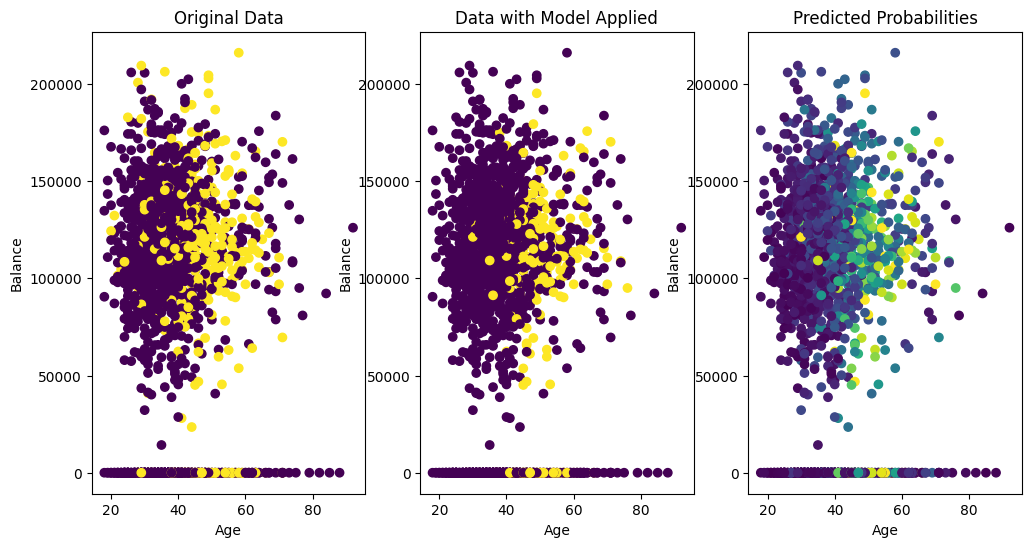

In [68]:
import matplotlib.pyplot as plt
# Create a graph to visualize the data
plt.figure(figsize=(12, 6))

# Plot the original data
plt.subplot(1, 3, 1)
plt.scatter(X_test['Age'], X_test['Balance'], c=y_test)
plt.title('Original Data')
plt.xlabel('Age')
plt.ylabel('Balance')

# Plot the data with the model applied
plt.subplot(1, 3, 2)
plt.scatter(X_test['Age'], X_test['Balance'], c=y_pred)
plt.title('Data with Model Applied')
plt.xlabel('Age')
plt.ylabel('Balance')

# Plot the predicted probabilities
plt.subplot(1, 3, 3)
plt.scatter(X_test['Age'], X_test['Balance'], c=mlp.predict_proba(X_test_scaled)[:, 1])
plt.title('Predicted Probabilities')
plt.xlabel('Age')
plt.ylabel('Balance')

plt.show()

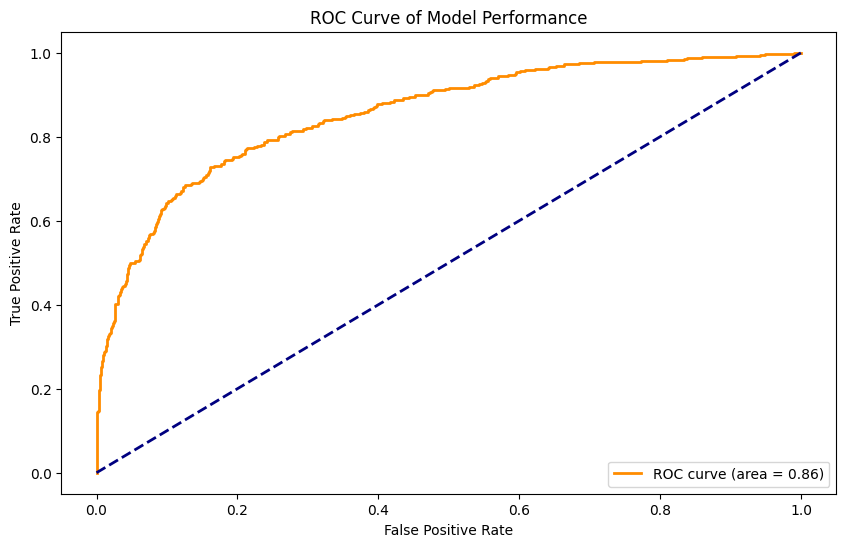

In [69]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve of Model Performance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()